<a href="https://colab.research.google.com/github/Liub-ov/data_analysis_2023/blob/main/Lab2_Peleshenko_FI32mn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from google.colab.patches import cv2_imshow
import cv2 as cv
from sklearn.utils import shuffle
from sklearn.datasets import load_sample_image
from sklearn.metrics import pairwise_distances_argmin

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

import re
import string
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

from wordcloud import WordCloud

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


from collections import Counter


In [2]:
#Зниження розмірності і візуалізація даних
df = pd.read_csv('/content/sample_data/StressLevelDataset.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

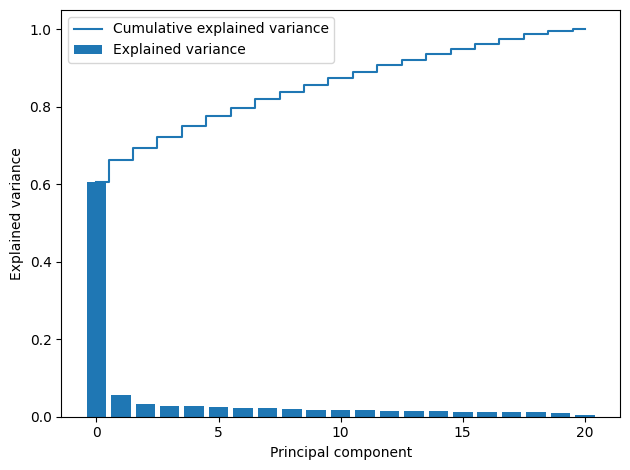

In [3]:
X = df
y = df['mental_health_history']
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_std)
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, align='center', label='Explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance')
plt.xlabel('Principal component')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [4]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)


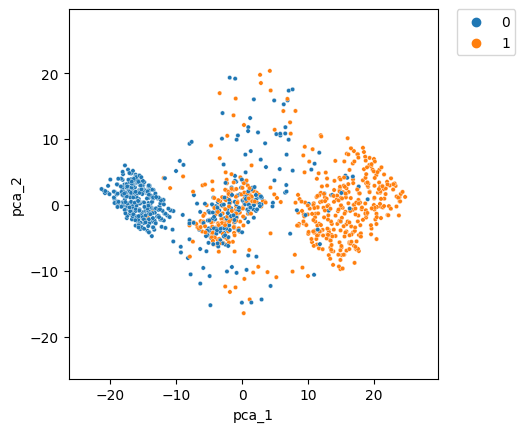

In [5]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

pca_result_df = pd.DataFrame({'pca_1': pca_result[:,0], 'pca_2': pca_result[:,1], 'label': y})

fig, ax = plt.subplots(1)
sns.scatterplot(x='pca_1', y='pca_2', hue='label', data=pca_result_df, ax=ax,s=10)
lim = (pca_result.min()-5, pca_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

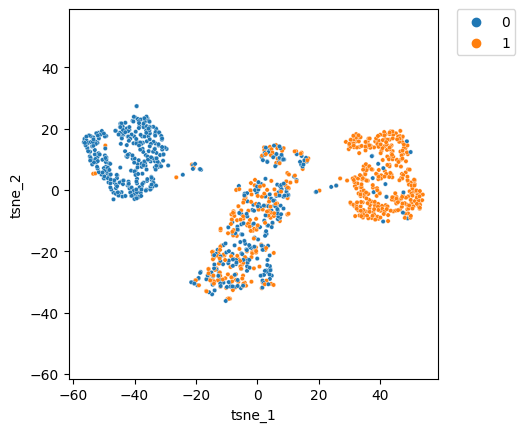

In [6]:
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(X)

tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y})

fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=10)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

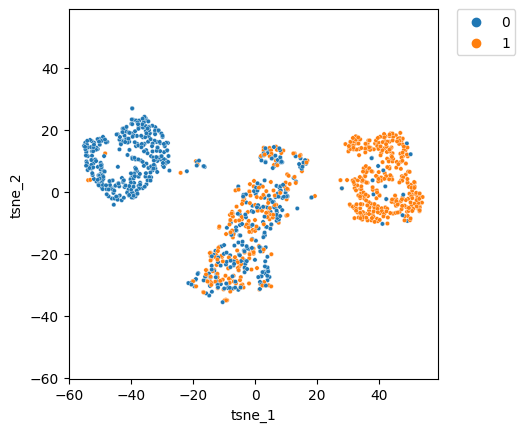

In [7]:
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(X)

tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y})

fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=10)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

In [17]:
img = cv.imread('/content/sample_data/mountains.jpg')
img = np.array(img, dtype=np.float64) / 255

w, h, d = original_shape = tuple(img.shape)
assert d == 3
image_array = np.reshape(img, (w * h, d))
#plt.imshow(img)

In [18]:
def quantized(n_colors):
  image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
  kmeans = KMeans(n_clusters=n_colors, n_init="auto", random_state=0).fit(
      image_array_sample
  )

  labels = kmeans.predict(image_array)

  def recreate_image(codebook, labels, w, h):
      """Recreate the (compressed) image from the code book & labels"""
      return codebook[labels].reshape(w, h, -1)

  plt.clf()
  plt.axis("off")
  plt.title(f"Quantized image ({n_colors} colors, K-Means)")
  plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

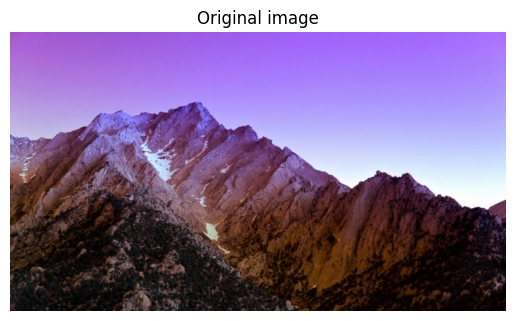

In [19]:
plt.clf()
plt.axis("off")
plt.title("Original image")
plt.imshow(img)

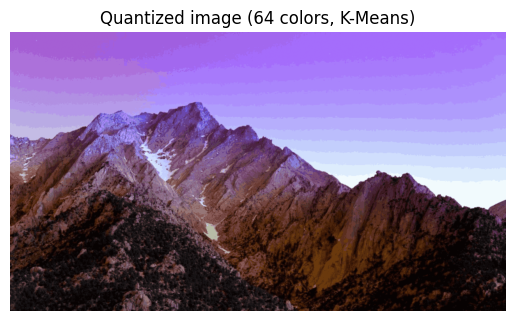

In [20]:
quantized(64)

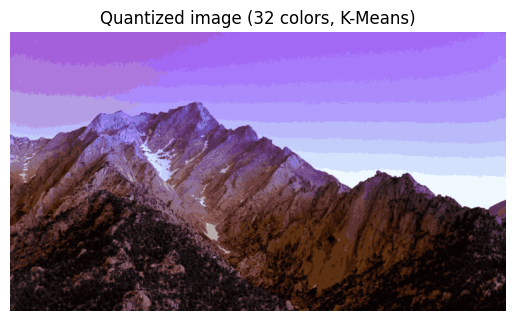

In [21]:
quantized(32)

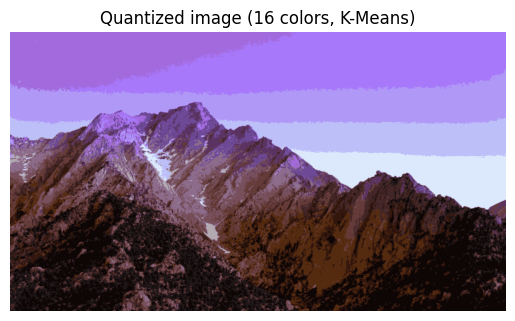

In [22]:
quantized(16)

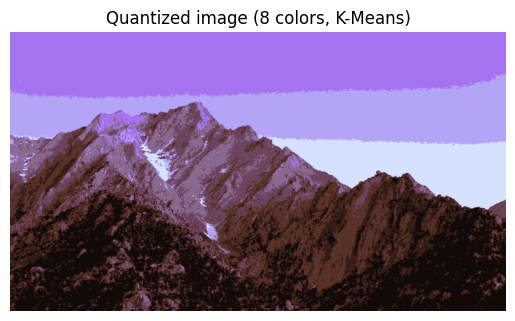

In [23]:
quantized(8)

In [24]:
#Обробка та класифікація текстових даних
dft = pd.read_csv('/content/sample_data/bbc-text.csv')
dft.columns

Index(['category', 'text'], dtype='object')

In [25]:
Counter(dft['category'])

Counter({'tech': 401,
         'business': 510,
         'sport': 511,
         'entertainment': 386,
         'politics': 417})

In [26]:
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
for i in range (len(dft)):
  txt = dft.at[i, 'text']
  txt = re.sub('[%s]' % re.escape(string.punctuation), ' ', txt)
  txt = ' '.join([word for word in txt.split(' ') if word not in stop_words])
  dft.at[i,'text'] = txt


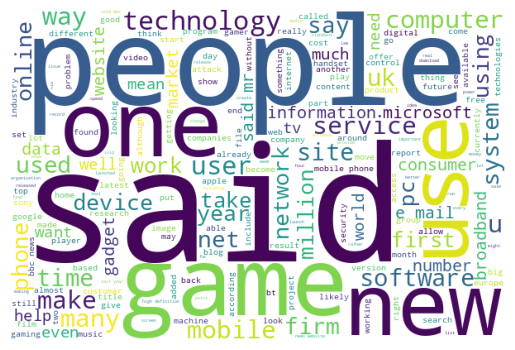

In [28]:
def visualize(label):
    text = ''
    for msg in dft[dft['category'] == label]['text']:
        msg = msg.lower()
        text += msg + ' '
    wordcloud = WordCloud(width=600, height=400, background_color="white").generate(text)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

visualize('tech')

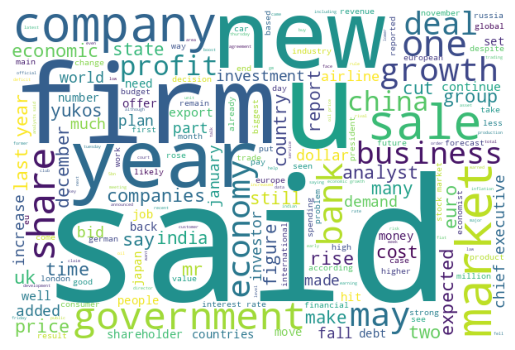

In [29]:
visualize('business')

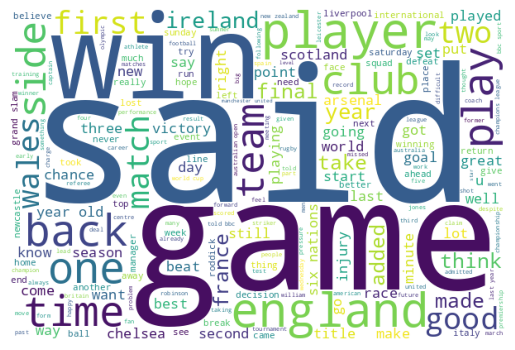

In [30]:
visualize('sport')

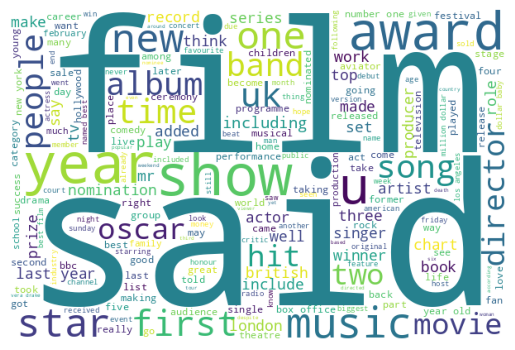

In [31]:
visualize('entertainment')

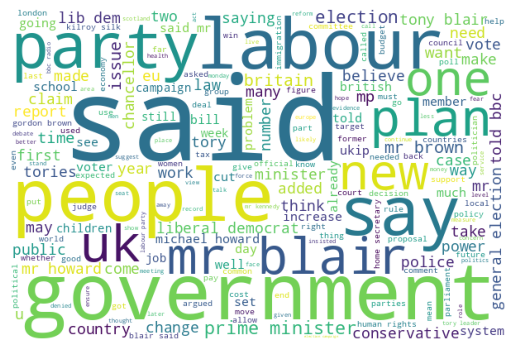

In [32]:
visualize('politics')

In [33]:
print(dft)

           category                                               text
0              tech  tv future hands viewers home theatre systems  ...
1          business  worldcom boss  left books alone  former worldc...
2             sport  tigers wary farrell  gamble  leicester say rus...
3             sport  yeading face newcastle fa cup premiership side...
4     entertainment  ocean twelve raids box office ocean twelve  cr...
...             ...                                                ...
2220       business  cars pull us retail figures us retail sales fe...
2221       politics  kilroy unveils immigration policy ex chatshow ...
2222  entertainment  rem announce new glasgow concert us band rem a...
2223       politics  political squabbles snowball become commonplac...
2224          sport  souness delight euro progress boss graeme soun...

[2225 rows x 2 columns]


In [34]:
tfidf_vectorizer = TfidfVectorizer(max_df=5000)

tfidf_train = tfidf_vectorizer.fit_transform(dft.category)
tfidf_test =  tfidf_vectorizer.transform(dft.category)

clf = LogisticRegression().fit(tfidf_train, dft.category)

predicted = clf.predict(tfidf_test)
print(classification_report(dft.category, predicted))

               precision    recall  f1-score   support

     business       1.00      1.00      1.00       510
entertainment       1.00      1.00      1.00       386
     politics       1.00      1.00      1.00       417
        sport       1.00      1.00      1.00       511
         tech       1.00      1.00      1.00       401

     accuracy                           1.00      2225
    macro avg       1.00      1.00      1.00      2225
 weighted avg       1.00      1.00      1.00      2225



In [35]:
print(confusion_matrix(dft.category, predicted))

[[510   0   0   0   0]
 [  0 386   0   0   0]
 [  0   0 417   0   0]
 [  0   0   0 511   0]
 [  0   0   0   0 401]]
